# Technology focus: Curio Seeker
This notebook will present a rough overview of the plotting functionalities that `spatialdata` implements for Curio Seeker data.

## Loading the data
Instructions on how to obtain Curio data [can be found here](https://github.com/giovp/spatialdata-sandbox/blob/main/curio_io/). Then, please use the `to_zarr.py` file to convert the raw data to Zarr.

In [9]:
# please use symlinks or copy the data to make this path available
curio_zarr_path = "./curio.zarr"

In [10]:
import spatialdata as sd

curio_sdata = sd.read_zarr(curio_zarr_path)
curio_sdata

SpatialData object with:
├── Shapes
│     └── 'cells': GeoDataFrame shape: (69713, 2) (2D shapes)
└── Table
      └── AnnData object with n_obs × n_vars = 69713 × 24270
    obs: 'cluster', 'region', 'instance_id'
    uns: 'Top_cluster_defining_features', 'bead_matching_quality', 'gene_alignment_quality', 'overall_sample_quality', 'read_quality', 'spatialdata_attrs'
    obsm: 'spatial': AnnData (69713, 24270)
with coordinate systems:
▸ 'global', with elements:
        cells (Shapes)

## Visualise the data
We are going to visualize gene expression and cluster assignments on top of the circular capture locations (beads). For this, we need to load the `spatialdata_plot` library which extends the `sd.SpatialData` object with the `.pl` module. 

In [27]:
import spatialdata_plot

curio_sdata.table.to_df().head(3)
# We will use the gene "Pdcd6" since it has a considerate variable expression across the tissue slice

,0610005C13Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,0610031O16Rik,...,n-R5-8s1,n-R5s162,n-R5s195,n-R5s205,n-R5s213,n-R5s47,n-R5s67,n-R5s77,n-R5s85,n-R5s96
AAAAAAAAAAAACA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAAAAAACC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAAAAAAAAAAAGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Gene expression

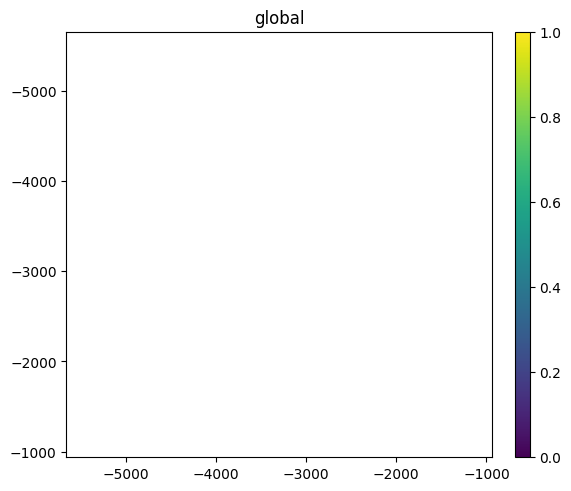

In [25]:
curio_sdata.pl.render_shapes(groups="instance_id", color='Pdcd6').pl.show()

### Cluster assignment

TypeError: Input must be Index or array-like

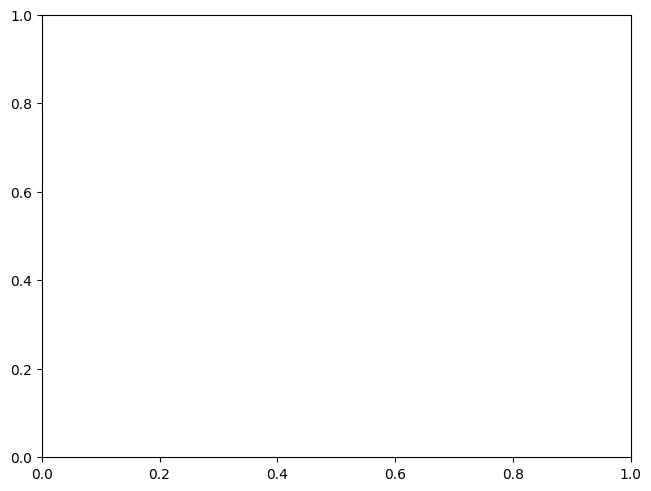

In [23]:
curio_sdata.pl.render_shapes(groups="instance_id", color='cluster').pl.show()

We can also provide `ax` objects to `spatialdata_plot` for further customisation.

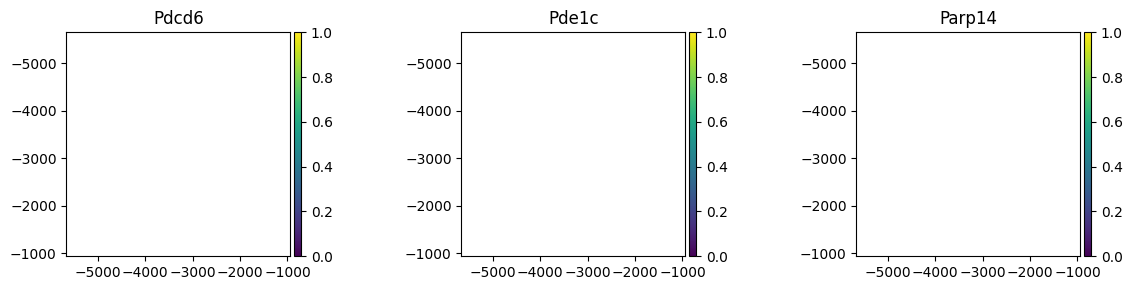

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))

curio_sdata.pl.render_shapes(groups="instance_id", color="Pdcd6").pl.show(ax=axs[0], title="Pdcd6")

curio_sdata.pl.render_shapes(groups="instance_id", color="Pde1c").pl.show(ax=axs[1], title="Pde1c")

curio_sdata.pl.render_shapes(groups="instance_id", color="Parp14").pl.show(ax=axs[2], title="Parp14")

plt.tight_layout()